In [1]:
import os
import torch
import numpy as np

from CODE.AttentionDCA_python.src.plot_functions import contact_plot
from CODE.AttentionDCA_python.src.dcascore import score, compute_PPV
from CODE.AttentionDCA_python.src.utils import quickread

cwd = os.getcwd()
print(cwd)

filename = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_concatenated_nodupli.fasta'
structfile = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old_processed.dat'

Z, W = quickread(filename)
W = W / W.sum()
q = int(Z.max()) + 1
N, M = Z.shape

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA
Total sequences read: 15539
Sequences after filtering: 15539
Sampling 100000 pairs out of 120722491 total pairs.
Mean fraction of identical positions (sampled): 0.31306173668889564
Computed theta: 0.3884217895361633


100%|██████████| 15539/15539 [00:12<00:00, 1281.33it/s]

3515.9189003436304


In [2]:
def read_tensor_from_txt(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    # Read the dimensions from the first line
    dims = list(map(int, lines[0].strip().split()))
    
    # Initialize a list to hold the tensor data
    tensor_data = []
    
    current_slice = []
    for line in lines[1:]:
        line = line.strip()
        if line.startswith("Slice"):
            if current_slice:  # If there is an existing slice, save it
                tensor_data.append(current_slice)
                current_slice = []
        elif line:  # Process non-empty lines
            current_slice.append(list(map(float, line.split(','))))
    
    if current_slice:  # Append the last slice
        tensor_data.append(current_slice)
    
    # Convert the list back into a tensor with the original dimensions
    tensor = torch.tensor(tensor_data).view(*dims)
    return tensor

## 32 Heads##

## 1 run masks with 44% dom1 44% dom2 12% inter   ##
## 1 run masks with 23% dom1 59% dom2 7% inter   ##
## 1 run masks with 34% dom1 44% dom2 22% inter   ##

In [3]:
loss_type = 'without_J'

family = 'HK-RR_new_mask_14_14_4_66_newhope_correct'
H = 32
d= 23
n_epochs = 300
K32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

family = 'HK-RR_w_mask64_Hs_10_29_3'
H = 32
d= 23
n_epochs = 300
K32_23_w_mask64_10 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_w_mask64_10 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_w_mask64_10 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

family = 'HK-RR_wo_new_mask_newhope_correct'
H = 32
d= 23
n_epochs = 300
K32_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

family = 'HK-RR_w_mask64_11_14_7'
H = 32
d= 23
n_epochs = 500
K32_23_w_mask64_11 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_w_mask64_11 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_w_mask64_11 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))



In [4]:
ranking32_23_wo_mask, _ = score(Q32_23_wo_mask, K32_23_wo_mask, V32_23_wo_mask)

In [5]:
ranking32_23_wo_mask

[(91, 108, 17.725705064823646),
 (75, 92, 17.539994353930336),
 (18, 74, 16.965183148648173),
 (22, 77, 13.148623865758172),
 (150, 170, 12.708610879450418),
 (95, 119, 12.652998972045976),
 (96, 120, 12.391728916308018),
 (24, 41, 9.813641046027467),
 (21, 46, 9.611857865667439),
 (25, 167, 9.466788071427596),
 (81, 168, 9.182695175352157),
 (126, 138, 8.846974332966978),
 (44, 73, 8.678338863243606),
 (37, 80, 8.396187547151992),
 (115, 140, 8.279235909841248),
 (40, 76, 8.219893023327941),
 (68, 99, 7.992168679814801),
 (116, 144, 7.881394996198578),
 (69, 75, 7.6583015688872855),
 (147, 167, 7.393098199419162),
 (68, 117, 6.892493905576347),
 (66, 93, 6.867464064906119),
 (93, 102, 6.865403601334772),
 (43, 73, 6.850067163199489),
 (75, 94, 6.825204179569825),
 (120, 128, 6.711544917218567),
 (20, 41, 6.563698764540666),
 (100, 120, 6.4155170551914065),
 (97, 119, 6.40862283013767),
 (127, 156, 6.097273296385843),
 (36, 76, 5.879617667483082),
 (29, 84, 5.698081430321273),
 (113, 1

In [4]:
ranking32_23_wo_mask, _ = score(Q32_23_wo_mask, K32_23_wo_mask, V32_23_wo_mask)
ranking32_23_w_mask, _ = score(Q32_23_w_mask, K32_23_w_mask, V32_23_w_mask, separation_heads= 66, H1 =14, H2=28)
ranking32_23_w_mask64_10, _ = score(Q32_23_w_mask64_10, K32_23_w_mask64_10, V32_23_w_mask64_10, separation_heads= 64, H1 =10, H2=29)
ranking32_23_w_mask64_11, _ = score(Q32_23_w_mask64_11, K32_23_w_mask64_11, V32_23_w_mask64_11, separation_heads= 64, H1 =11, H2=25)

176


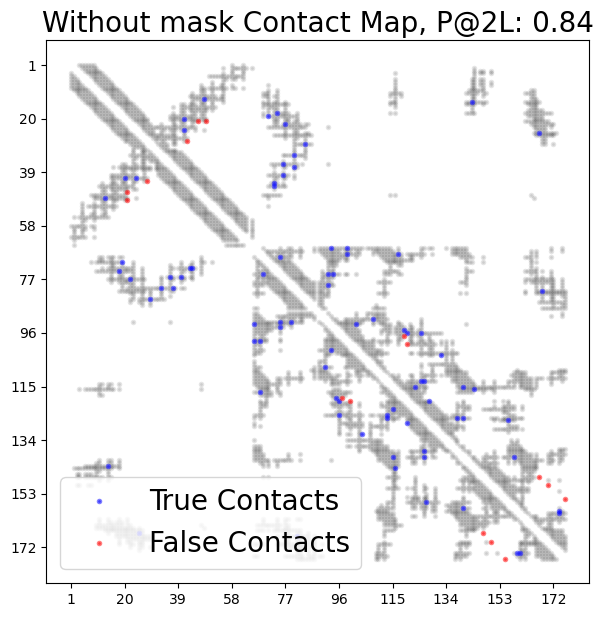

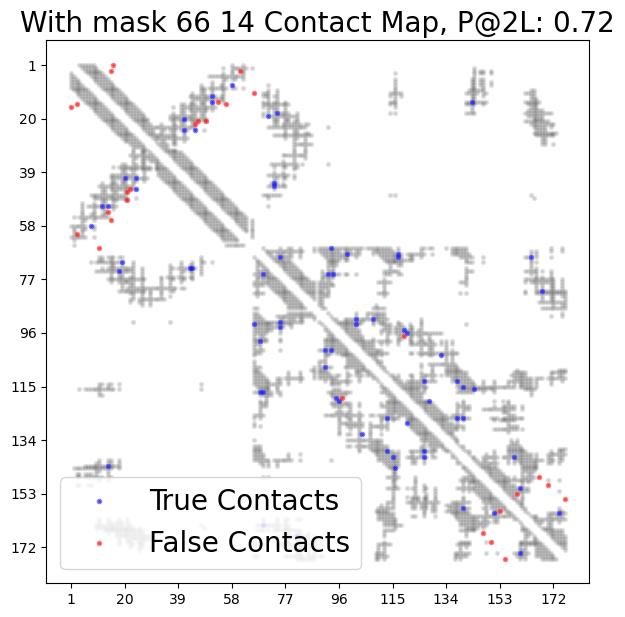

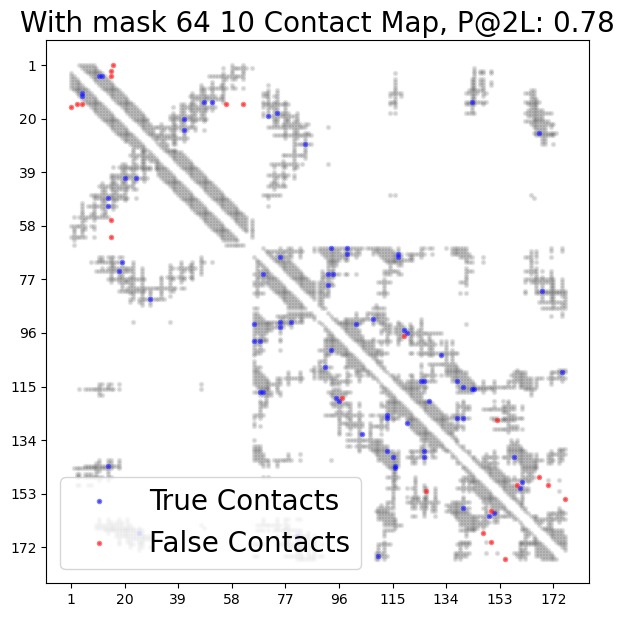

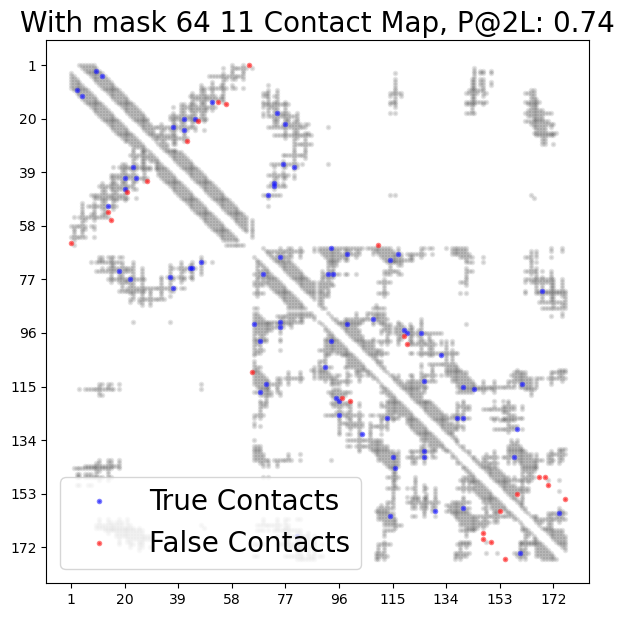

In [5]:
#N = 100  # Number of top predictions to consider

ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 50
# Call the contact_plot function

figurename = 'Without mask'
fake32_23_wo_mask = contact_plot(ranking32_23_wo_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")
figurename = 'With mask 66 14'
fake32_23_w_mask = contact_plot(ranking32_23_w_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")
figurename = 'With mask 64 10'
fake32_23_w_mask64_10 = contact_plot(ranking32_23_w_mask64_10, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")
figurename = 'With mask 64 11'
fake32_23_w_mask64_11 = contact_plot(ranking32_23_w_mask64_11, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")


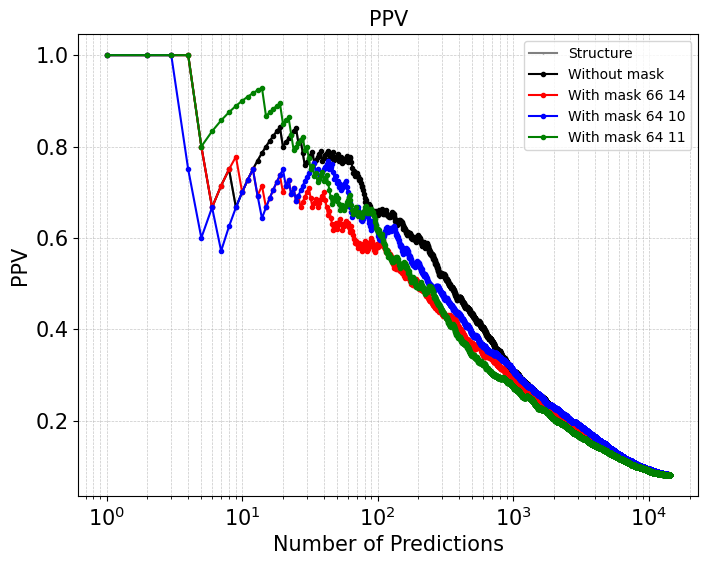

In [6]:
PPv_wo =compute_PPV(ranking32_23_wo_mask, structfile)
ppv_w_mask66_14 = compute_PPV(ranking32_23_w_mask,structfile)
ppv_w_mask64_10 = compute_PPV(ranking32_23_w_mask64_10,structfile)
ppv_w_mask64_11 = compute_PPV(ranking32_23_w_mask64_11,structfile)

PPVs =[PPv_wo, PPv_wo, ppv_w_mask66_14, ppv_w_mask64_10, ppv_w_mask64_11]
labels = ['Without mask', 'With mask 66 14', 'With mask 64 10', 'With mask 64 11']
from CODE.AttentionDCA_python.src.plot_functions import graphAtt, graphPPV
figtitle = 'PPV'
graphPPV(PPVs, labels, figtitle)

## PPV per domain ##

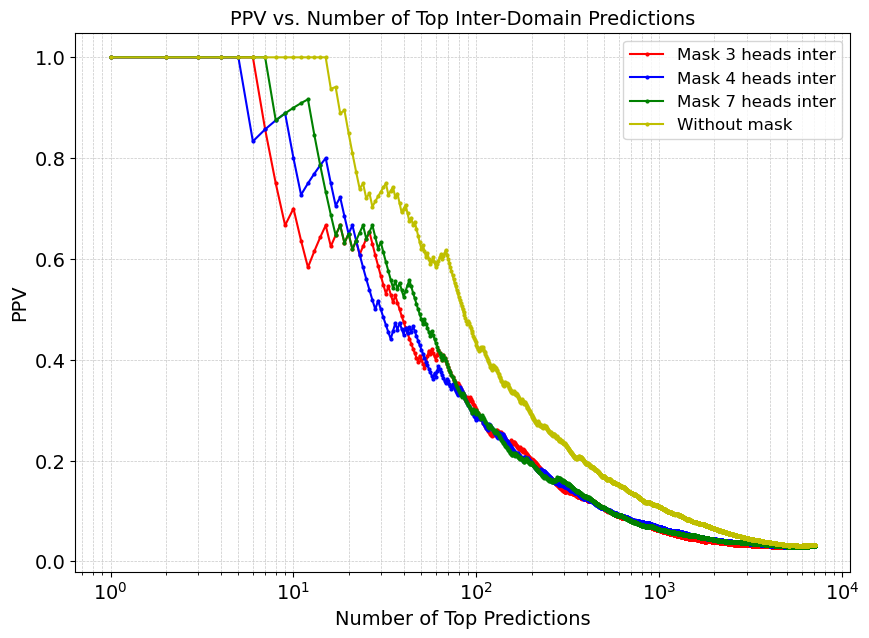

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def compute_residue_pair_dist(filedist):
    """
    Reads a structure file and computes residue pair distances.

    Parameters:
    - filedist: Path to the structure file

    Returns:
    - A dictionary with keys (sitei, sitej) and values as distances
    """
    import numpy as np
    d = np.loadtxt(filedist)
    if d.shape[1] == 4:
        return {
            (int(round(row[0])), int(round(row[1]))): row[3]
            for row in d if row[3] != 0
        }
    elif d.shape[1] == 3:
        return {
            (int(round(row[0])), int(round(row[1]))): row[2]
            for row in d if row[2] != 0
        }
    else:
        raise ValueError("Unexpected number of columns in the structure file.")

def compute_referencescore(score, dist, domain1_end=64, domain2_start=65, mindist=6, cutoff=8.0):
    """
    Computes reference scores and PPV values for inter-domain interactions.

    Parameters:
    - score: List of tuples (sitei, sitej, plmscore)
    - dist: Dictionary of distances between residue pairs
    - domain1_end: Last residue index of Domain 1
    - domain2_start: Starting residue index of Domain 2
    - mindist: Minimum separation between residues
    - cutoff: Distance cutoff to consider a contact

    Returns:
    - List of tuples (sitei, sitej, plmscore, PPV)
    """
    nc2 = len(score)
    out = []
    ctrtot = 0
    ctr = 0
    for i in range(nc2):
        sitei, sitej, plmscore = score[i]
        
        # Check if the pair is inter-domain
        in_domain1 = 1 <= sitei <= domain1_end
        in_domain2 = domain2_start <= sitei <= 176
        in_domain1_j = 1 <= sitej <= domain1_end
        in_domain2_j = domain2_start <= sitej <= 176
        
        # Select only inter-domain pairs
        if (in_domain1 and in_domain2_j) or (in_domain2 and in_domain1_j):
            # Retrieve distance
            if (sitei, sitej) in dist:
                dij = dist[(sitei, sitej)]
            elif (sitej, sitei) in dist:
                dij = dist[(sitej, sitei)]
            else:
                continue  # Skip if distance not available
            
            # Apply minimum distance separation
            if abs(sitej - sitei) >= mindist:
                ctrtot += 1
                if dij < cutoff:
                    ctr += 1
                PPV = ctr / ctrtot
                out.append((sitei, sitej, plmscore, PPV))
    
    return out

def compute_PPV_inter(score, filestruct, domain1_end=64, domain2_start=65, min_separation=6, cutoff=8.0):
    """
    Computes the Positive Predictive Value (PPV) for inter-domain interactions.

    Parameters:
    - score: List of tuples (sitei, sitej, plmscore)
    - filestruct: Path to the structure file
    - domain1_end: Last residue index of Domain 1
    - domain2_start: Starting residue index of Domain 2
    - min_separation: Minimum separation between residues
    - cutoff: Distance cutoff to consider a contact

    Returns:
    - List of PPV values
    """
    dist = compute_residue_pair_dist(filestruct)
    ref_scores = compute_referencescore(
        score, dist, domain1_end=domain1_end, domain2_start=domain2_start, 
        mindist=min_separation, cutoff=cutoff
    )
    return [x[3] for x in ref_scores]

def graphInterDomainPPV(PPVs, labels, figtitle,
                        fig_size=(8, 6),
                        colors=["r", "b", "g", "y", "c", "m"],
                        fs=15):
    """
    Plot PPV sequences for inter-domain interactions on a semi-logarithmic plot.

    Parameters:
    - PPVs (list of lists or numpy arrays): List containing inter-domain PPV sequences.
    - labels (list of str): List of labels for each PPV sequence.
    - figtitle (str): Title of the plot.
    - fig_size (tuple, optional): Size of the figure in inches. Default is (8, 6).
    - colors (list of str, optional): List of colors for PPV sequences. Default is ["r", "b", "g", "y", "c", "m"].
    - fs (int, optional): Font size for labels and ticks. Default is 15.
    """
    # Validate inputs
    if len(labels) != len(PPVs):
        raise ValueError("Number of labels must match the number of PPV sequences.")
    
    # Create a new figure with specified size
    plt.figure(figsize=fig_size)
    
    # Iterate over each PPV sequence and plot
    for idx, (ppv, label) in enumerate(zip(PPVs, labels)):
        x = np.arange(1, len(ppv) + 1)
        color = colors[idx % len(colors)]  # Cycle through colors if necessary
        plt.semilogx(x, ppv, ".-", markersize=4, label=label, color=color)
    
    # Set font sizes for ticks
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    
    # Label axes with specified font size
    plt.xlabel("Number of Top Predictions", fontsize=fs)
    plt.ylabel("PPV", fontsize=fs)
    
    # Set plot title with specified font size
    plt.title(figtitle, fontsize=fs)
    
    # Add legend if multiple PPVs are plotted
    if len(PPVs) > 1:
        plt.legend(fontsize=fs-2)
    
    # Add grid for better readability
    plt.grid(True, which="both", ls="--", linewidth=0.5, alpha=0.7)
    
    # Display the plot
    plt.show()


# Suppose you have three different PPV sequences from different models
# Replace these with your actual PPV lists
ppv_inter_w_mask64_10 = compute_PPV_inter(ranking32_23_w_mask64_10, structfile)
ppv_inter_w_mask66_14 = compute_PPV_inter(ranking32_23_w_mask, structfile)
ppv_inter_w_mask66_11 = compute_PPV_inter(ranking32_23_w_mask64_11, structfile)
ppv_inter_wo_mask= compute_PPV_inter(ranking32_23_wo_mask, structfile)




# List of PPV sequences
PPVs = [
    ppv_inter_w_mask64_10,
    ppv_inter_w_mask66_14,
    ppv_inter_w_mask66_11,
    ppv_inter_wo_mask,

]


# Corresponding labels for each PPV sequence
labels = [
    "Mask 3 heads inter",
    "Mask 4 heads inter",
    "Mask 7 heads inter",
    "Without mask"
]

# Plotting the PPV for inter-domain interactions
graphInterDomainPPV(
    PPVs=PPVs,
    labels=labels,
    figtitle="PPV vs. Number of Top Inter-Domain Predictions",
    fig_size=(10, 7),
      # Customize colors as needed
    fs=14
)


## La percentuale di teste per intersezione per avere il ppv migliore cambia a seconda di quante teste totali ho##

## 40 HEADS ##
## masks 37% dom1 50% dom2 13 % inter ##

In [8]:
loss_type = 'without_J'
family = 'HK-RR_wo_mask64'
H = 40
d= 23
n_epochs = 300
K40_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q40_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V40_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

family = 'HK-RR_w_mask64_Hs_15_20_5'
H = 40
d= 23
n_epochs = 300
K40_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q40_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V40_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

In [9]:
ranking40_23_w_mask, _ = score(Q40_23_w_mask, K40_23_w_mask, V40_23_w_mask, separation_heads= 64, H1 =15, H2=35)
ranking40_23_wo_mask, _ = score(Q40_23_wo_mask, K40_23_wo_mask, V40_23_wo_mask)

176


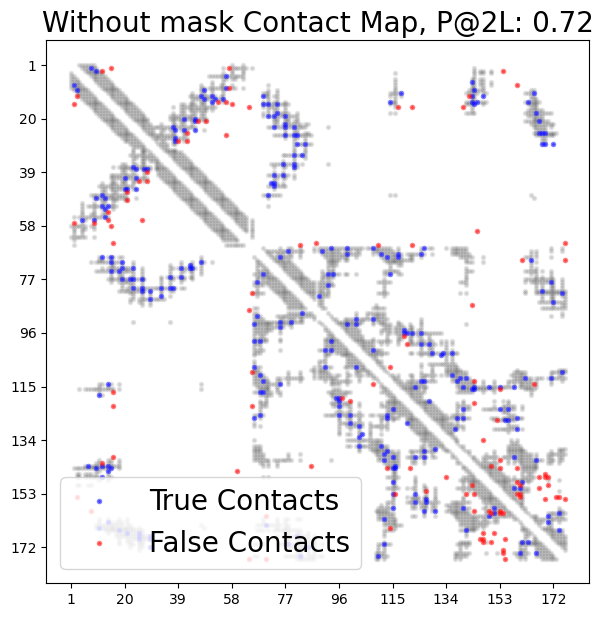

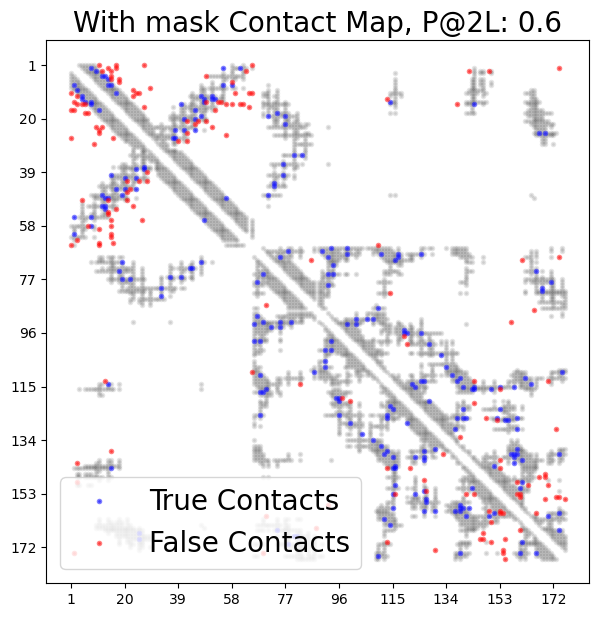

In [10]:
#N = 100  # Number of top predictions to consider

ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 200
# Call the contact_plot function

figurename = 'Without mask'
fake40_23_wo_mask = contact_plot(ranking40_23_wo_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")
figurename = 'With mask'
fake40_23_w_mask = contact_plot(ranking40_23_w_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")



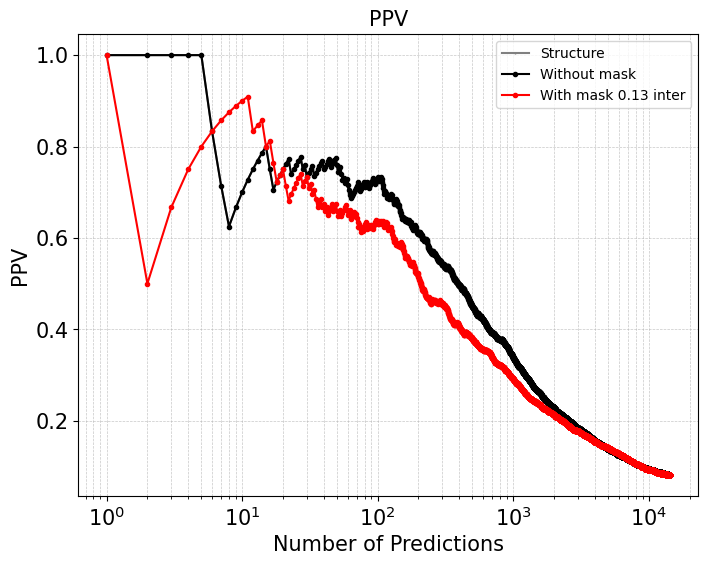

In [11]:
PPv_wo =compute_PPV(ranking40_23_wo_mask, structfile)
ppv_w_mask = compute_PPV(ranking40_23_w_mask,structfile)


PPVs =[PPv_wo, PPv_wo, ppv_w_mask]
labels = ['Without mask', 'With mask 0.13 inter']
from CODE.AttentionDCA_python.src.plot_functions import graphAtt, graphPPV
figtitle = 'PPV'
graphPPV(PPVs, labels, figtitle)

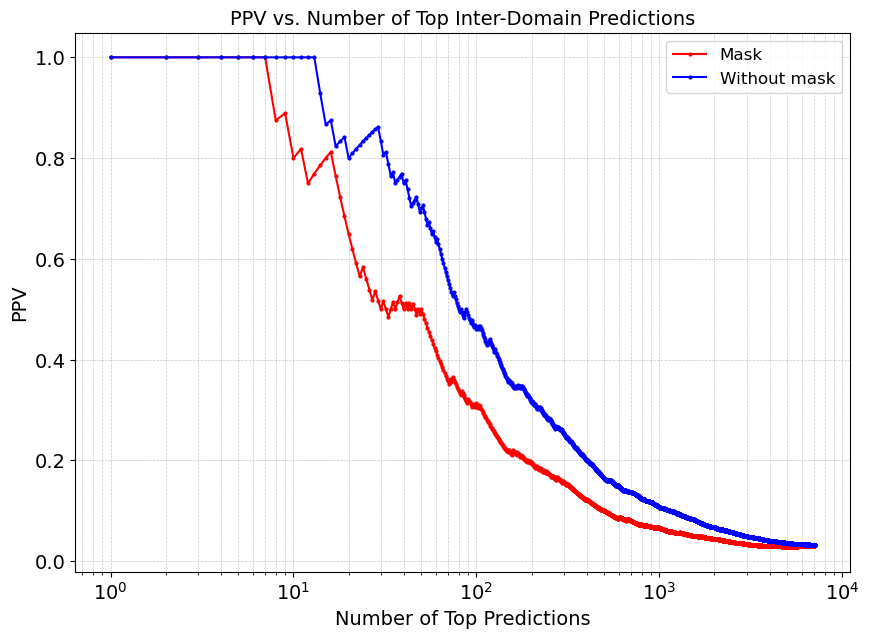

In [12]:
# Suppose you have three different PPV sequences from different models
# Replace these with your actual PPV lists

ppv_inter_w_mask = compute_PPV_inter(ranking40_23_w_mask, structfile)
ppv_inter_wo_mask= compute_PPV_inter(ranking40_23_wo_mask, structfile)




# List of PPV sequences
PPVs = [
    ppv_inter_w_mask,
    ppv_inter_wo_mask,

]


# Corresponding labels for each PPV sequence
labels = [
    "Mask",
    "Without mask"
]

# Plotting the PPV for inter-domain interactions
graphInterDomainPPV(
    PPVs=PPVs,
    labels=labels,
    figtitle="PPV vs. Number of Top Inter-Domain Predictions",
    fig_size=(10, 7),
    colors=["r", "b", "g"],  # Customize colors as needed
    fs=14
)

## 48 HEADS ##
## Masks 40% dom1 44% dom2 16 % dom3 ##

In [13]:
loss_type = 'without_J'
family = 'HK-RR_wo_mask'
H = 48
d= 23
n_epochs = 300
K48_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q48_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V48_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

family = 'HK-RR_w_mask64_Hs_19_21_8'
H = 48
d= 23
n_epochs = 300
K48_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q48_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V48_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

In [14]:
ranking48_23_wo_mask, _ = score(Q48_23_wo_mask, K48_23_wo_mask, V48_23_wo_mask)
ranking48_23_w_mask, _ = score(Q48_23_w_mask, K48_23_w_mask, V48_23_w_mask, separation_heads= 64, H1 =19, H2=40)

176


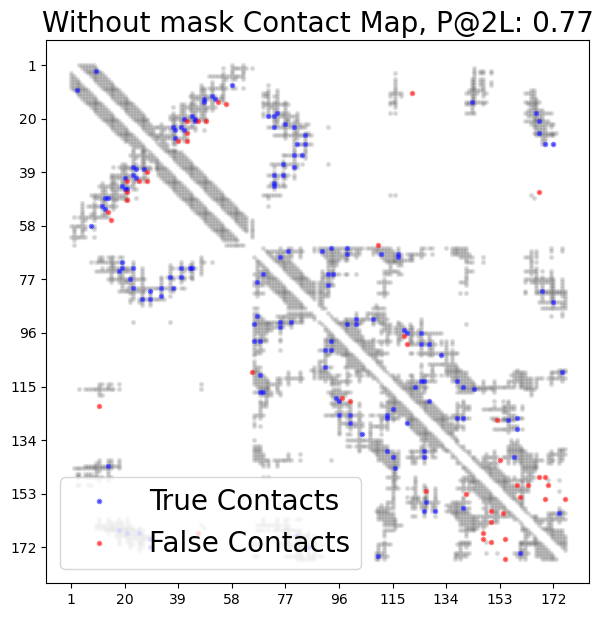

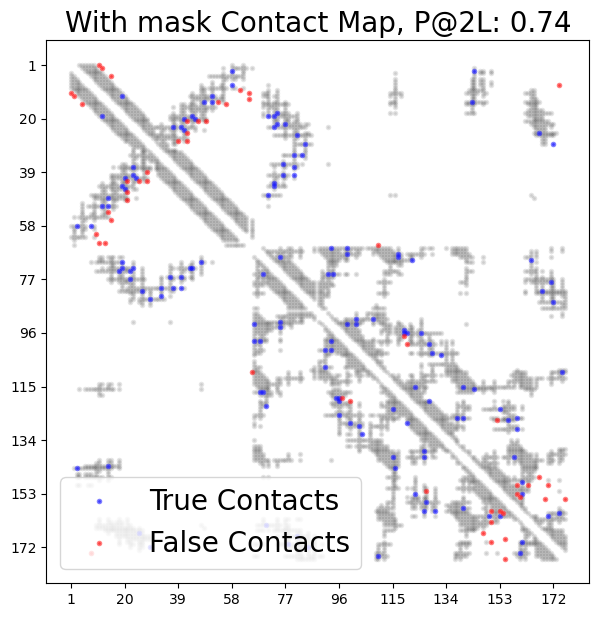

In [15]:
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 100
# Call the contact_plot function

figurename = 'Without mask'
fake48_23_wo_mask = contact_plot(ranking48_23_wo_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")
figurename = 'With mask'
fake48_23_w_mask = contact_plot(ranking48_23_w_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")



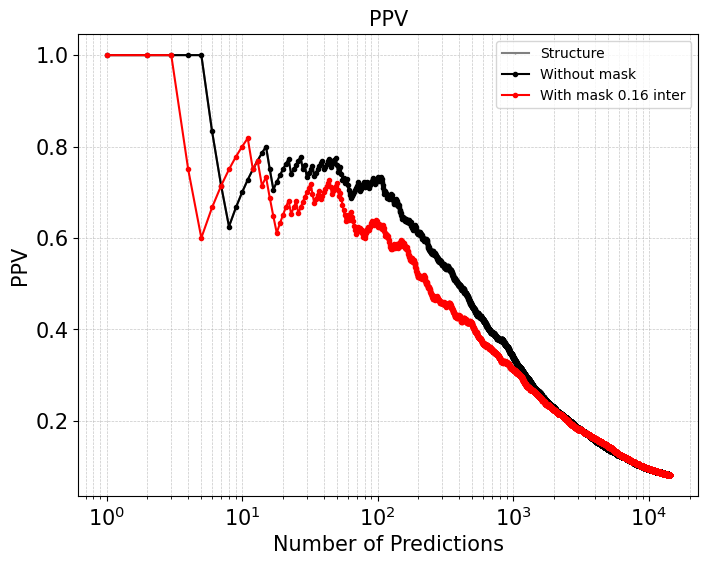

In [16]:
ppv_w_mask = compute_PPV(ranking48_23_w_mask, structfile)
ppv_wo_mask= compute_PPV(ranking48_23_wo_mask, structfile)


PPVs =[PPv_wo, PPv_wo, ppv_w_mask]
labels = ['Without mask', 'With mask 0.16 inter']
from CODE.AttentionDCA_python.src.plot_functions import graphAtt, graphPPV
figtitle = 'PPV'
graphPPV(PPVs, labels, figtitle)

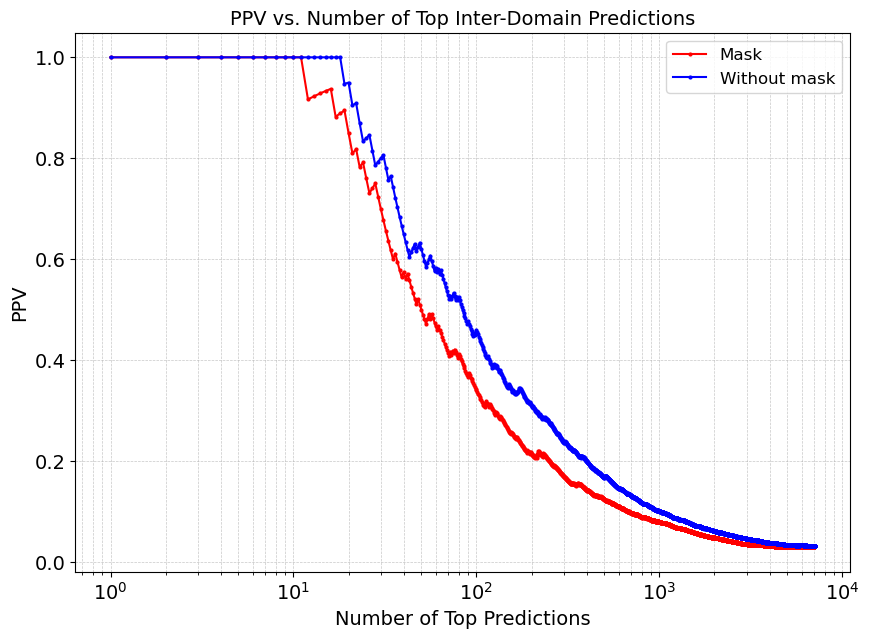

In [17]:
# Suppose you have three different PPV sequences from different models
# Replace these with your actual PPV lists

ppv_inter_w_mask = compute_PPV_inter(ranking48_23_w_mask, structfile)
ppv_inter_wo_mask= compute_PPV_inter(ranking48_23_wo_mask, structfile)


PPVs = [
    ppv_inter_w_mask,
    ppv_inter_wo_mask,

]
# Corresponding labels for each PPV sequence
labels = [
    "Mask",
    "Without mask"
]

# Plotting the PPV for inter-domain interactions
graphInterDomainPPV(
    PPVs=PPVs,
    labels=labels,
    figtitle="PPV vs. Number of Top Inter-Domain Predictions",
    fig_size=(10, 7),
    colors=["r", "b", "g"],  # Customize colors as needed
    fs=14
)

## 60 HEADS ##
## 37% dom1 43% dom2 20% inter ##

In [18]:
loss_type = 'without_J'
family = 'HK-RR_wo_mask'
H = 60
d= 23
n_epochs = 300
K60_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q60_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V60_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

family = 'HK-RR_w_mask64_Hs_22_26_12'
H = 60
d= 23
n_epochs = 300
K60_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q60_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V60_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

In [19]:
ranking60_23_wo_mask, _ = score(Q60_23_wo_mask, K60_23_wo_mask, V60_23_wo_mask)
ranking60_23_w_mask, _ = score(Q60_23_w_mask, K60_23_w_mask, V60_23_w_mask, separation_heads= 64, H1 =22, H2=48)

176


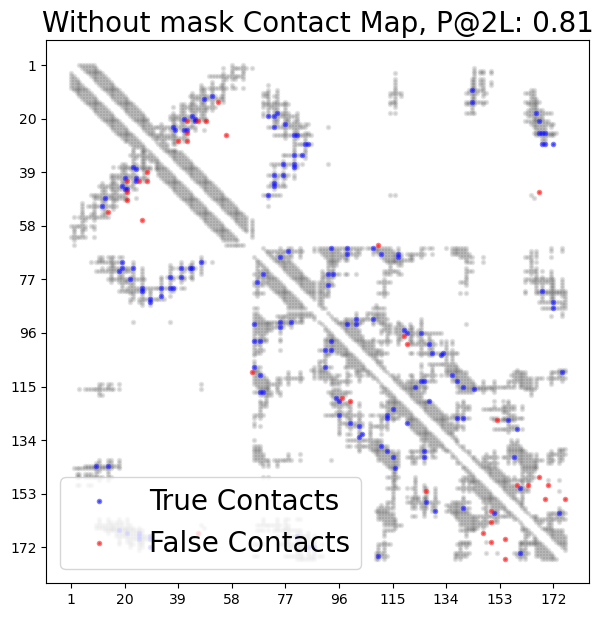

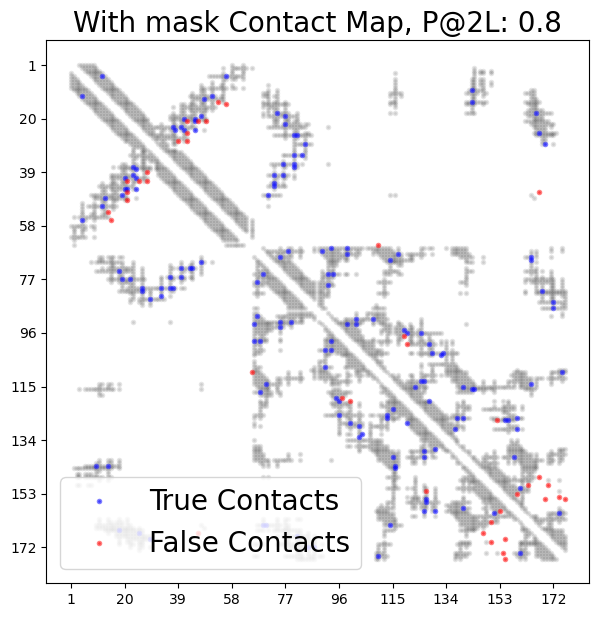

In [20]:
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 100
# Call the contact_plot function

figurename = 'Without mask'
fake60_23_wo_mask = contact_plot(ranking60_23_wo_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")
figurename = 'With mask'
fake60_23_w_mask = contact_plot(ranking60_23_w_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")



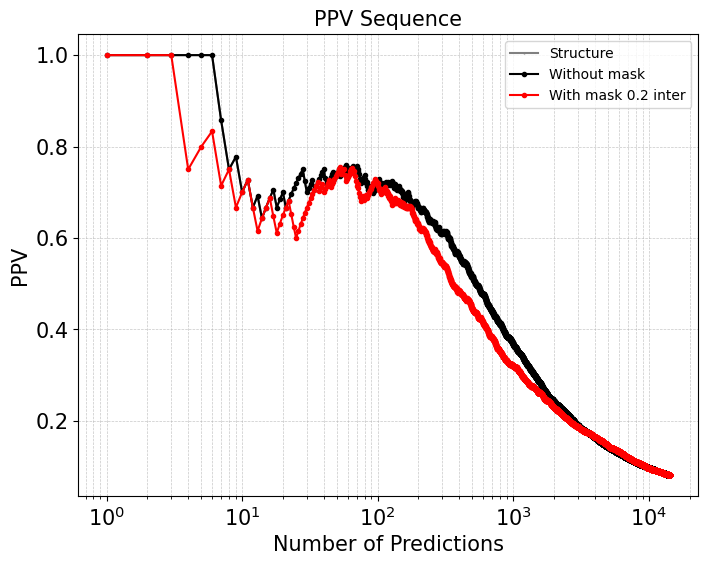

In [21]:
from CODE.AttentionDCA_python.src.plot_functions import  graphPPV
ppv_inter_w_mask  =compute_PPV(ranking60_23_w_mask, structfile)
ppv_inter_wo_mask =compute_PPV(ranking60_23_wo_mask, structfile)

PPVs = [ppv_inter_wo_mask,ppv_inter_wo_mask, ppv_inter_w_mask]

labels = ["Without mask", "With mask 0.2 inter"]
figtitle = "PPV Sequence"

graphPPV(  PPVs, labels, figtitle )

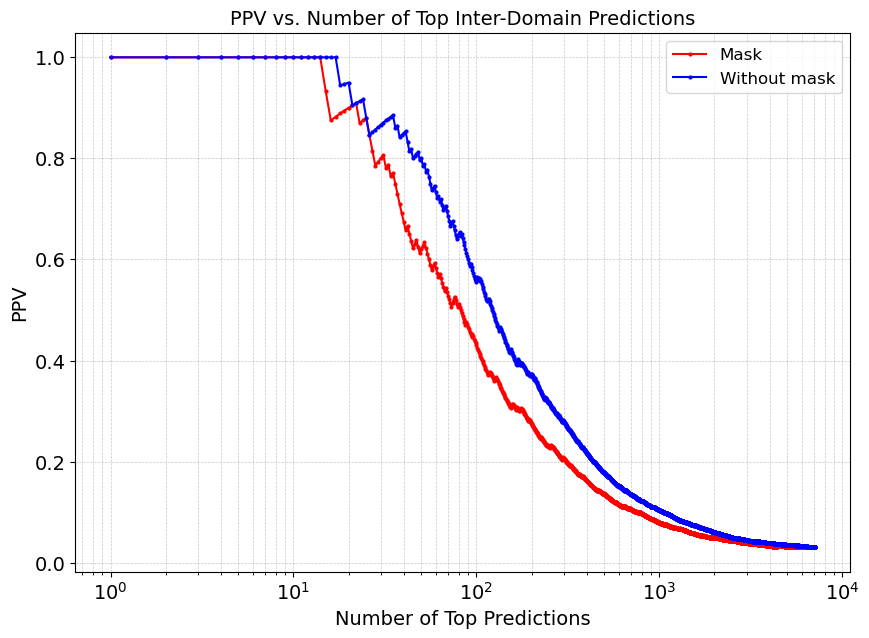

In [22]:
# Suppose you have three different PPV sequences from different models
# Replace these with your actual PPV lists

ppv_inter_w_mask = compute_PPV_inter(ranking60_23_w_mask, structfile)
ppv_inter_wo_mask= compute_PPV_inter(ranking60_23_wo_mask, structfile)




# List of PPV sequences
PPVs = [
    ppv_inter_w_mask,
    ppv_inter_wo_mask,

]


# Corresponding labels for each PPV sequence
labels = [
    "Mask",
    "Without mask"
]

# Plotting the PPV for inter-domain interactions
graphInterDomainPPV(
    PPVs=PPVs,
    labels=labels,
    figtitle="PPV vs. Number of Top Inter-Domain Predictions",
    fig_size=(10, 7),
    colors=["r", "b", "g"],  # Customize colors as needed
    fs=14
)

## 70 HEADS ##
## 37% dom1 43% dom2 20% inter ##

In [23]:
loss_type = 'without_J'
family = 'HK-RR_wo_mask'
H = 70
d= 23
n_epochs = 500
K70_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q70_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V70_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

family = 'HK-RR_w_mask64_26_29_15'
H = 70
d= 23
n_epochs = 500
K70_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q70_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V70_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

In [24]:
ranking70_23_wo_mask, _ = score(Q70_23_wo_mask, K70_23_wo_mask, V70_23_wo_mask)
ranking70_23_w_mask, _ = score(Q70_23_w_mask, K70_23_w_mask, V70_23_w_mask, separation_heads= 64, H1 =26, H2=55)

176


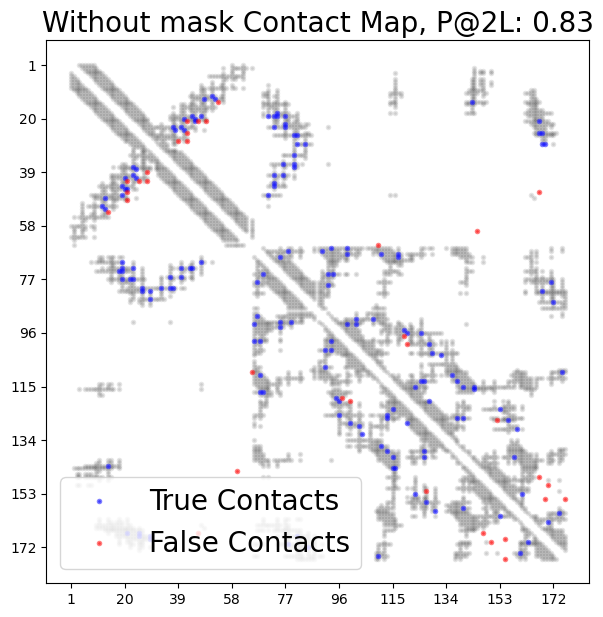

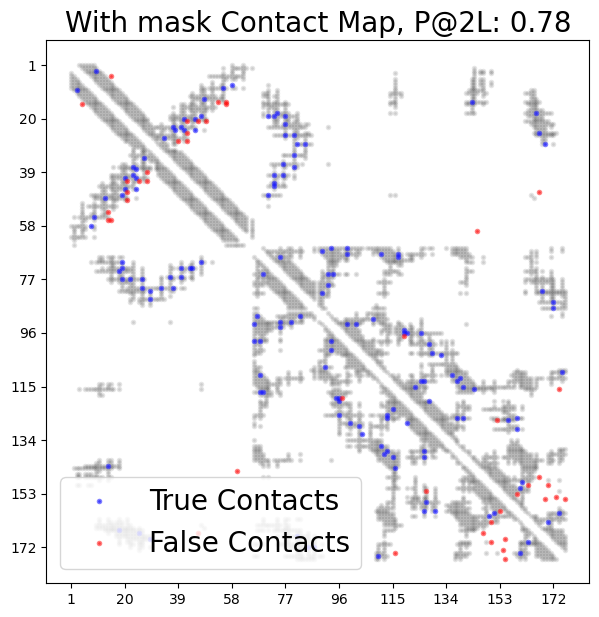

In [25]:
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 100
# Call the contact_plot function

figurename = 'Without mask'
fake70_23_wo_mask = contact_plot(ranking70_23_wo_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")
figurename = 'With mask'
fake70_23_w_mask = contact_plot(ranking70_23_w_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")



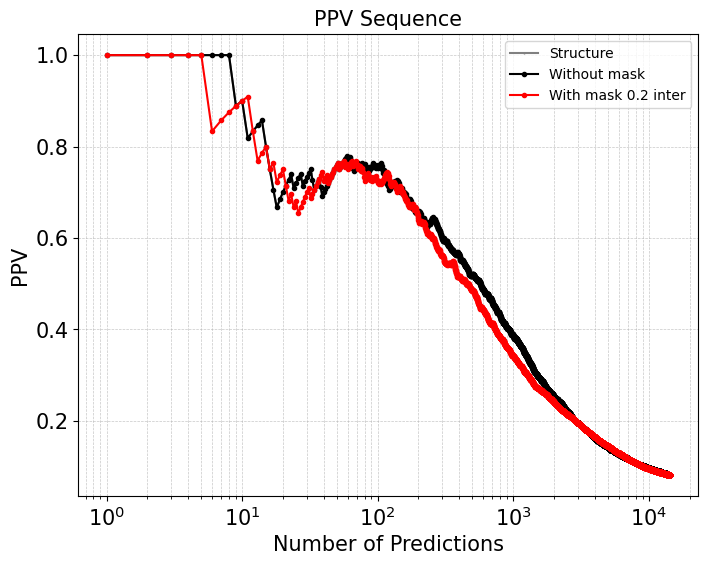

In [26]:
from CODE.AttentionDCA_python.src.plot_functions import  graphPPV
ppv_inter_w_mask  =compute_PPV(ranking70_23_w_mask, structfile)
ppv_inter_wo_mask =compute_PPV(ranking70_23_wo_mask, structfile)

PPVs = [ppv_inter_wo_mask,ppv_inter_wo_mask, ppv_inter_w_mask]

labels = ["Without mask", "With mask 0.2 inter"]
figtitle = "PPV Sequence"

graphPPV(  PPVs, labels, figtitle )

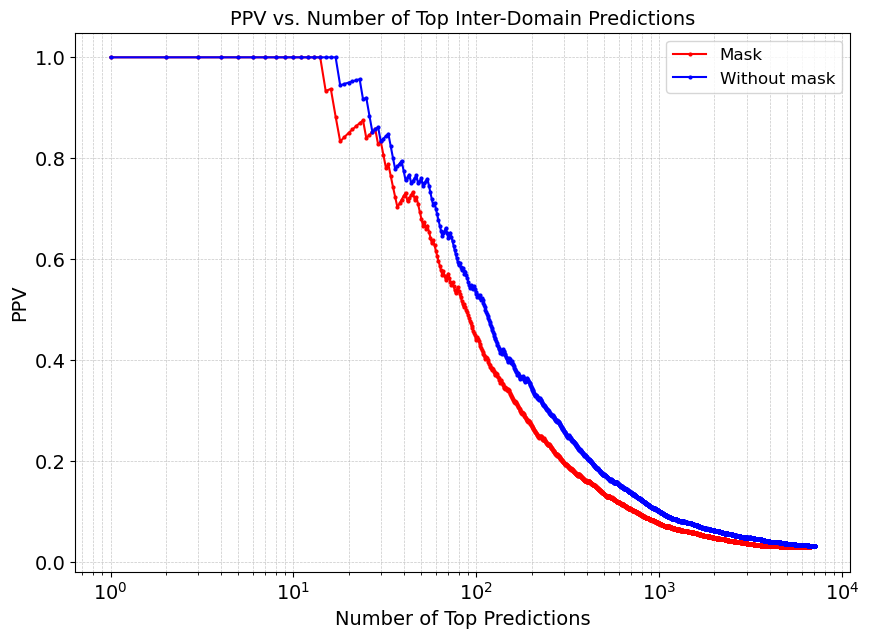

In [27]:
# Suppose you have three different PPV sequences from different models
# Replace these with your actual PPV lists

ppv_inter_w_mask = compute_PPV_inter(ranking70_23_w_mask, structfile)
ppv_inter_wo_mask= compute_PPV_inter(ranking70_23_wo_mask, structfile)




# List of PPV sequences
PPVs = [
    ppv_inter_w_mask,
    ppv_inter_wo_mask,

]


# Corresponding labels for each PPV sequence
labels = [
    "Mask",
    "Without mask"
]

# Plotting the PPV for inter-domain interactions
graphInterDomainPPV(
    PPVs=PPVs,
    labels=labels,
    figtitle="PPV vs. Number of Top Inter-Domain Predictions",
    fig_size=(10, 7),
    colors=["r", "b", "g"],  # Customize colors as needed
    fs=14
)

## 80 HEADS ##
## 37% dom1 43% dom2 20% inter ##

In [28]:
loss_type = 'without_J'
family = 'HK-RR_wo_mask'
H = 80
d= 23
n_epochs = 500
K80_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q80_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V80_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

family = 'HK-RR_w_mask64_29_31_20'
H = 80
d= 23
n_epochs = 500
K80_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q80_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V80_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

In [29]:
ranking80_23_wo_mask, _ = score(Q80_23_wo_mask, K80_23_wo_mask, V80_23_wo_mask)
ranking80_23_w_mask, _ = score(Q80_23_w_mask, K80_23_w_mask, V80_23_w_mask, separation_heads= 64, H1 = 29,  H2=60)

176


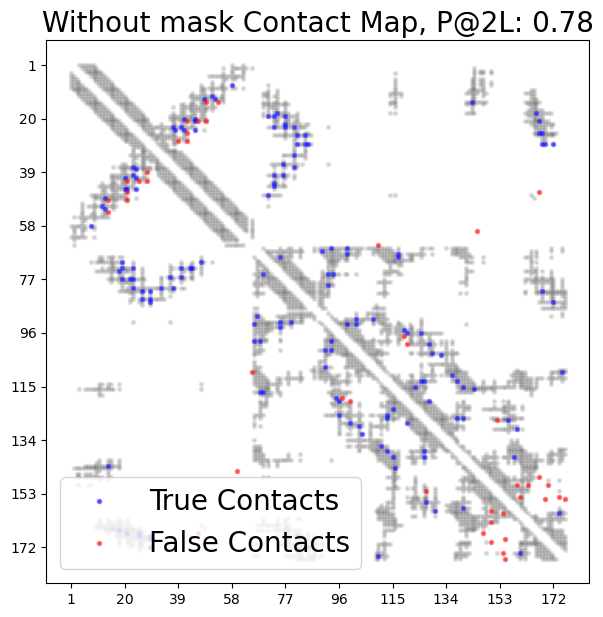

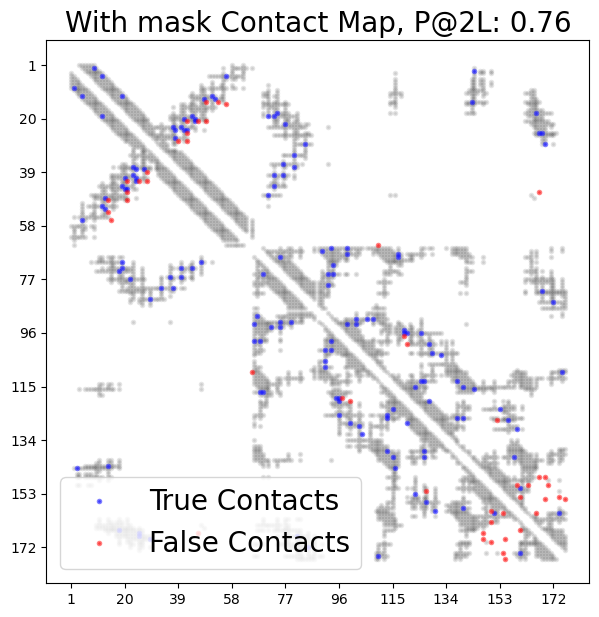

In [30]:
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 100
# Call the contact_plot function

figurename = 'Without mask'
fake80_23_wo_mask = contact_plot(ranking80_23_wo_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")
figurename = 'With mask'
fake80_23_w_mask = contact_plot(ranking80_23_w_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")



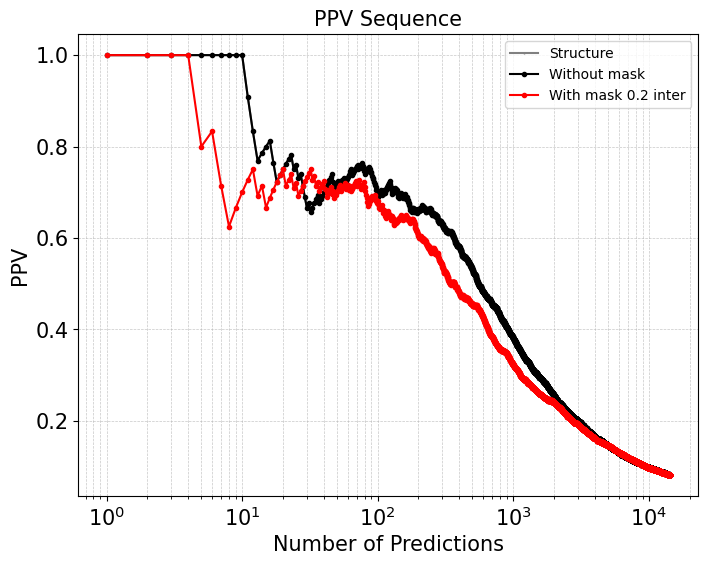

In [31]:
from CODE.AttentionDCA_python.src.plot_functions import  graphPPV
ppv_inter_w_mask  =compute_PPV(ranking80_23_w_mask, structfile)
ppv_inter_wo_mask =compute_PPV(ranking80_23_wo_mask, structfile)

PPVs = [ppv_inter_wo_mask,ppv_inter_wo_mask, ppv_inter_w_mask]

labels = ["Without mask", "With mask 0.2 inter"]
figtitle = "PPV Sequence"

graphPPV(  PPVs, labels, figtitle )

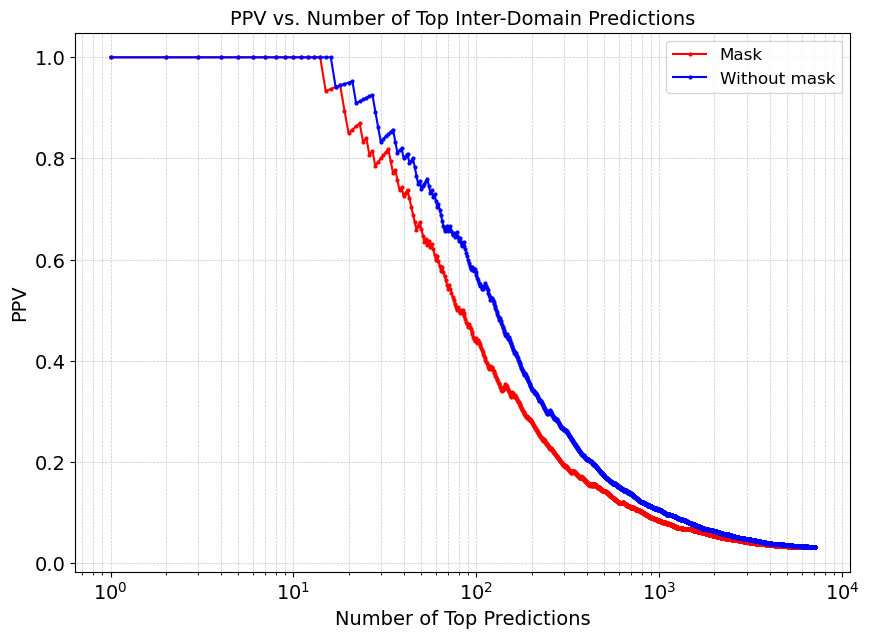

In [32]:
# Suppose you have three different PPV sequences from different models
# Replace these with your actual PPV lists

ppv_inter_w_mask = compute_PPV_inter(ranking80_23_w_mask, structfile)
ppv_inter_wo_mask= compute_PPV_inter(ranking80_23_wo_mask, structfile)




# List of PPV sequences
PPVs = [
    ppv_inter_w_mask,
    ppv_inter_wo_mask,

]


# Corresponding labels for each PPV sequence
labels = [
    "Mask",
    "Without mask"
]

# Plotting the PPV for inter-domain interactions
graphInterDomainPPV(
    PPVs=PPVs,
    labels=labels,
    figtitle="PPV vs. Number of Top Inter-Domain Predictions",
    fig_size=(10, 7),
    colors=["r", "b", "g"],  # Customize colors as needed
    fs=14
)

## Let's consider the fake ones WIHOUT masks one ##

In [14]:

def get_scalar_contributions(i, j, Z, V, sf, H, top_k = 5):
    device = V.device
    if isinstance(Z, np.ndarray):
        Z = torch.from_numpy(Z).to(device).long()  # Shape: (N, M)
    elif isinstance(Z, torch.Tensor):
        Z = Z.to(device).long()
    else:
        raise TypeError("Z must be a NumPy array or a PyTorch tensor.")
    # Step 1: Extract amino acid indices at position j for all sequences
    aa_j = Z[j, :]  # Shape: (M,)
    #aa_j = aa_j.long()  # Ensure type is long for indexing

    # Step 2: Gather the corresponding V vectors based on aa_j indices
    # V has shape (H, q, q)
    # Expand aa_j for each head
    aa_j_expanded = aa_j.unsqueeze(0).expand(H, M)  # Shape: (H, M)

    # Gather V vectors
    # V_selected will have shape (H, M, q)
    V_selected = V.gather(1, aa_j_expanded.unsqueeze(-1).expand(-1, -1, V.size(-1)))  # Shape: (H, M, q)

    # Step 3: Extract attention weights for contact (i, j) across all heads
    # sf has shape (H, L, L) where L = N = 176
    attention_weights = sf[:, i, j]  # Shape: (H,)

    # Step 4: Compute contributions per sequence
    attention_weights_expanded = attention_weights.view(H, 1, 1)  # Shape: (H, 1, 1)
    contributions = attention_weights_expanded * V_selected  # Shape: (H, M, q)

    # Step 5: Aggregate contributions across all heads
    mat_ene = contributions.sum(dim=0)  # Shape: (M, q)

    # Step 6: (Optional) Aggregate contributions across amino acid dimensions
    scalar_contributions = mat_ene.sum(dim=1)  # Shape: (M,)

    # Step 7: Identify top contributing sequences
    
    top_contributors = torch.argsort(scalar_contributions, descending=True)[:top_k] 
    return scalar_contributions, top_contributors

import numpy as np
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from CODE.AttentionDCA_python.src.utils import read_fasta_alignment, remove_duplicate_sequences

# Assuming you have the following functions already defined:
# - read_fasta_alignment()
# - remove_duplicate_sequences()
# - compute_theta_large() and related functions
# - ReadFasta()
# - quickread()

def identify_top_contributors(scalar_contributions, top_k=5):
    """
    Identify the top_k contributing sequences based on scalar contributions.

    Parameters:
    - scalar_contributions: numpy array of shape (M,), scalar contributions for each sequence.
    - top_k: int, number of top contributors to identify.

    Returns:
    - top_indices: list of int, indices of top contributing sequences.

    """
    print(scalar_contributions)
    #top_contribution = torch.argsort(scalar_contributions, descending=True)[:top_k]
    #take the indices of the top k values in scalar_contributions, being it a torch tenso


    top_indices = torch.argsort(scalar_contributions, descending=True)[:top_k] 

    #top_indices = np.argsort(scalar_contributions)[-top_k:][::-1]
    return top_indices

def get_unique_sequences(filename, max_gap_fraction=0.9, verbose=True):
    """
    Retrieve unique amino acid sequences in the same order as the columns of Z.

    Parameters:
    - filename: str, path to the original FASTA file.
    - max_gap_fraction: float, maximum allowed fraction of gaps in a sequence.
    - verbose: bool, whether to print status messages.

    Returns:
    - unique_sequences: list of str, unique amino acid sequences.
    """
    # Read the alignment matrix Z and get the list of filtered sequences
    Z, filtered_sequences = read_fasta_alignment(filename, max_gap_fraction, verbose=verbose, return_filtered=True)
    
    # Remove duplicate sequences and get their indices
    Z_unique, unique_indices = remove_duplicate_sequences(Z, verbose=verbose)
    
    # Extract unique sequences based on the unique_indices
    unique_sequences = [filtered_sequences[idx] for idx in unique_indices]
    
    return unique_sequences

def get_top_sequences(unique_sequences, top_indices):
    """
    Retrieve the top contributing sequences based on their indices.

    Parameters:
    - unique_sequences: list of str, unique amino acid sequences in order.
    - top_indices: list or array of int, indices of top contributing sequences.

    Returns:
    - top_sequences: list of str, top contributing amino acid sequences.
    """
    top_sequences = [unique_sequences[idx] for idx in top_indices]
    return top_sequences

def write_top_contributors_fasta(top_sequences, output_filename="top_contributors.fasta"):
    """
    Write top contributing sequences to a separate FASTA file with generic headers.

    Parameters:
    - top_sequences: list of str, amino acid sequences.
    - output_filename: str, name of the output FASTA file.
    """
    records = []
    for idx, seq in enumerate(top_sequences, start=1):
        # Ensure seq is a string
        if not isinstance(seq, str):
            print(f"Warning: Sequence at index {idx} is not a string. Attempting to convert.")
            try:
                seq = str(seq)
            except Exception as e:
                print(f"Error converting sequence at index {idx}: {e}")
                continue  # Skip this sequence
        
        # Create a SeqRecord
        record = SeqRecord(Seq(seq), id=f"Top_Contrib_{idx}", description="Top Contributor")
        records.append(record)
    
    # Write to FASTA
    try:
        SeqIO.write(records, output_filename, "fasta")
        print(f"Top contributing sequences have been written to {output_filename}.")
    except Exception as e:
        print(f"Error writing FASTA file: {e}")

def create_processed_fasta(original_fasta, top_sequences, output_processed_fasta="processed_original.fasta"):
    """
    Create a processed FASTA file excluding the top contributing sequences.

    Parameters:
    - original_fasta: str, path to the original FASTA file.
    - top_sequences: list of str, top contributing amino acid sequences.
    - output_processed_fasta: str, name of the output processed FASTA file.
    """
    # Convert top_sequences to a set for faster lookup
    top_sequences_set = set(top_sequences)
    
    # Read all sequences from the original FASTA
    sequences = []
    names = []
    def open_fasta(filename):
        if filename.endswith('.gz'):
            return gzip.open(filename, 'rt')
        else:
            return open(filename, 'r')
    
    with open_fasta(original_fasta) as f:
        seq_name = None
        seq_lines = []
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith('>'):
                if seq_name is not None:
                    sequences.append(''.join(seq_lines))
                    names.append(seq_name)
                seq_name = line[1:].strip()
                seq_lines = []
            else:
                seq_lines.append(line.upper())
        if seq_name is not None:
            sequences.append(''.join(seq_lines))
            names.append(seq_name)
    
    # Filter sequences based on max_gap_fraction as in read_fasta_alignment
    first_seq = sequences[0]
    indices = [i for i, c in enumerate(first_seq) if c != '.' and not c.islower()]
    fseqlen = len(indices)
    
    filtered_sequences = []
    filtered_names = []
    for name, seq in zip(names, sequences):
        ngaps = sum(1 for idx in indices if seq[idx] == '-')
        gap_fraction = ngaps / fseqlen
        if gap_fraction <= 0.9:
            filtered_sequences.append(seq)
            filtered_names.append(name)
        else:
            print(f"Sequence {name} excluded due to high gap fraction ({gap_fraction:.2f}).")
    
    # Remove duplicates to align with Z_unique
    seen = set()
    unique_filtered_sequences = []
    for seq in filtered_sequences:
        if seq not in seen:
            seen.add(seq)
            unique_filtered_sequences.append(seq)
    
    # Exclude top sequences
    processed_sequences = [seq for seq in unique_filtered_sequences if seq not in top_sequences_set]
    
    # Write to processed FASTA
    records = []
    for idx, seq in enumerate(processed_sequences, start=1):
        record = SeqRecord(Seq(seq), id=f"Processed_{idx}", description="")
        records.append(record)
    
    try:
        SeqIO.write(records, output_processed_fasta, "fasta")
        print(f"Processed FASTA (excluding top contributors) has been written to {output_processed_fasta}.")
    except Exception as e:
        print(f"Error writing processed FASTA file: {e}")

def verify_top_contributors(original_fasta, top_sequences):
    """
    Verifies that the top contributing sequences are present in the original FASTA.

    Parameters:
    - original_fasta: str, path to the original FASTA file.
    - top_sequences: list of str, amino acid sequences of top contributors.
    """
    # Read all sequences from the original FASTA
    Z, filtered_names, filtered_sequences = read_fasta_alignment(original_fasta, max_gap_fraction=0.9, verbose=False)
    Z_unique, unique_indices = remove_duplicate_sequences(Z, verbose=False)
    unique_sequences = [filtered_sequences[idx] for idx in unique_indices]
    
    # Create a set for faster lookup
    unique_sequences_set = set(unique_sequences)
    
    # Verify each top contributing sequence
    for idx, seq in enumerate(top_sequences, start=1):
        if seq in unique_sequences_set:
            print(f"Top contributor {idx} is present in the original FASTA.")
        else:
            print(f"Top contributor {idx} is NOT present in the original FASTA.")

N, M = Z.shape
Q, K,V = Q32_23_wo_mask, K32_23_wo_mask, V32_23_wo_mask
device = 'cpu'
e = torch.einsum('hdi,hdj->ijh', Q,K)  # Shape: (N, N, H)
sf = torch.zeros(N, N, H, device=device)
for h in range(H):
    sf_domain = torch.softmax(e[:, :, h], dim=1)
    #sf = sf.clone()
    sf[:, :, h] = sf_domain
sf = sf.permute(2, 0, 1)
is_js = [(149, 169), (146, 166), (154, 175)]

for i, j in is_js:
    top_k = 10
    scalar_contributions, top_contributors = get_scalar_contributions(i, j, Z, V, sf, H, top_k= top_k)
    scalar_contributions_cpu = scalar_contributions.detach().cpu().numpy()
    fastafile = filename
    # Read and process the FASTA to get unique sequences
    unique_sequences = get_unique_sequences(fastafile, max_gap_fraction=0.9, verbose=True)
    print(f"Total unique sequences: {len(unique_sequences)}")

    # ----- Step 2: Perform Training and Obtain scalar_contributions -----
    # This step depends on your specific model and training loop.
    # After training, you should have the `scalar_contributions` array.

    # For demonstration, let's assume scalar_contributions is already computed
    # Replace the following line with your actual scalar_contributions computation
    
    scalar_contributions, _ = get_scalar_contributions(i, j , Z, V , sf, H)  # Placeholder: Random contributions

    # ----- Step 3: Identify Top Contributing Sequences -----
      # Number of top contributors to extract
    top_indices = identify_top_contributors(scalar_contributions, top_k=top_k)
    print(f"Top {top_k} contributing sequence indices: {top_indices}")

    # ----- Step 4: Retrieve Top Contributing Sequences -----
    top_sequences = get_top_sequences(unique_sequences, top_indices)
    print("Top contributing sequences:")
    for idx, seq in enumerate(top_sequences, start=1):
        print(f"Sequence {idx}: {seq}")

    # ----- Step 5: Write Top Contributing Sequences to a Separate FASTA File -----
    output_filename = f"top_contributors_{i}_{j}.fasta"
    write_top_contributors_fasta(top_sequences, output_filename= output_filename)

    # ----- Step 6: Create a Processed FASTA File Excluding Top Contributors -----
    output_processed_fasta = f"processed_original_{i}_{j}.fasta"
    create_processed_fasta(
        original_fasta=fastafile,
        #unique_sequences=unique_sequences,
        top_sequences=top_sequences,
        output_processed_fasta = output_processed_fasta
    )

Total sequences read: 15539
Sequences after filtering: 15539
Removing duplicate sequences...
Done: 15539 -> 15539 sequences after removing duplicates.
Total unique sequences: 15539
tensor([ 0.6513,  0.4939, -0.3915,  ...,  0.4939,  0.4939,  0.4939])
Top 10 contributing sequence indices: tensor([ 1843,  2103, 11541, 13447, 10563,  2559,  2557,  6524,  6523, 11568])
Top contributing sequences:
Sequence 1: ('ECBG_03050_HK_Classic|Enterococcus_casseliflavus_EC20|Pair_ECBG_03049//ECBG_03049_RR_OmpR|Enterococcus_casseliflavus_EC20|Pair_ECBG_03050', '---LLTTSIVHDLNNFLTPMIGHLQLLIEHDEVLVEDLQEVCKAAEKGKELSSNVLRFSKLES-ILIVDDDPAIRRLIWKSLQSTGI-LIYQTDSVEKTIAINSRVSFDLFLLDISLEHNDGYHLAQLIREENPTVPIVFLSGKSDEKDMINGYEIGADHYITKPFSPALLKAQI-')
Sequence 2: ('Rfer_0703_HK_Classic|Rhodoferax_ferrireducens_T118|Pair_Rfer_0704//Rfer_0704_RR_NtrC|Rhodoferax_ferrireducens_T118|Pair_Rfer_0703', '---RMSAFVVHDLKNIVTQLSLMLKNAKRNPEFQQDMLLTVENSLDRMRQLMLQLRE--------LIVEDDLALQKQIKWSLD--RFES-VTAHDRSSALLQLRKCLPAVVTMDLGLPPDEGLK

## Lets remove the clostirium botulinum##

In [15]:
from Bio import SeqIO
import gzip

def filter_fasta_by_organism(input_fasta, output_fasta, organism_name, verbose=True):
    """
    Filters out sequences belonging to a specified organism from a FASTA file.
    
    Parameters:
    - input_fasta (str): Path to the original FASTA file.
    - output_fasta (str): Path to the output filtered FASTA file.
    - organism_name (str): Name of the organism to exclude (e.g., 'Clostridium_botulinum').
    - verbose (bool): Whether to print status messages.
    
    Returns:
    - None
    """
    # Determine if the input FASTA is gzipped
    if input_fasta.endswith('.gz'):
        handle = gzip.open(input_fasta, 'rt')
    else:
        handle = open(input_fasta, 'r')
    
    # Initialize counters
    total_sequences = 0
    excluded_sequences = 0
    retained_sequences = 0
    
    # Open the output FASTA file
    with open(output_fasta, 'w') as outfile:
        # Iterate through each record in the input FASTA
        for record in SeqIO.parse(handle, "fasta"):
            total_sequences += 1
            # Check if the organism name is in the description or ID (case-insensitive)
            if organism_name.lower() in record.description.lower() or organism_name.lower() in record.id.lower():
                excluded_sequences += 1
                if verbose:
                    print(f"Excluding sequence {record.id} belonging to {organism_name}.")
                continue  # Skip writing this sequence
            else:
                retained_sequences += 1
                SeqIO.write(record, outfile, "fasta")
    
    # Close the input FASTA handle
    handle.close()
    
    if verbose:
        print(f"Total sequences processed: {total_sequences}")
        print(f"Sequences excluded ({organism_name}): {excluded_sequences}")
        print(f"Sequences retained: {retained_sequences}")
        print(f"Filtered FASTA saved to: {output_fasta}")

# Step 1: Filter out Clostridium_botulinum sequences
original_fasta = filename  # Replace with your actual FASTA file path
filtered_fasta = "filtered_sequences_wo_clostridium.fasta"  # Output FASTA file without Clostridium_botulinum
organism_to_exclude = "Clostridium_botulinum"

filter_fasta_by_organism(
    input_fasta=original_fasta,
    output_fasta=filtered_fasta,
    organism_name=organism_to_exclude,
    verbose=True
)
    



Excluding sequence CLL_A3098_HK_Classic|Clostridium_botulinum_B_str._Eklund_17B|Pair_CLL_A3099//CLL_A3099_RR_OmpR|Clostridium_botulinum_B_str._Eklund_17B|Pair_CLL_A3098 belonging to Clostridium_botulinum.
Excluding sequence CLL_A1125_HK_Classic|Clostridium_botulinum_B_str._Eklund_17B|Pair_CLL_A1126//CLL_A1126_RR_OmpR|Clostridium_botulinum_B_str._Eklund_17B|Pair_CLL_A1125 belonging to Clostridium_botulinum.
Excluding sequence CLH_1059_HK_Classic|Clostridium_botulinum_E3_str._Alaska_E43|Pair_CLH_1060//CLH_1060_RR_OmpR|Clostridium_botulinum_E3_str._Alaska_E43|Pair_CLH_1059 belonging to Clostridium_botulinum.
Excluding sequence CLB_2073_HK_Classic|Clostridium_botulinum_A_str._ATCC_19397|Pair_CLB_2074//CLB_2074_RR_OmpR|Clostridium_botulinum_A_str._ATCC_19397|Pair_CLB_2073 belonging to Clostridium_botulinum.
Excluding sequence CLK_1598_HK_Classic|Clostridium_botulinum_A3_str._Loch_Maree|Pair_CLK_1599//CLK_1599_RR_OmpR|Clostridium_botulinum_A3_str._Loch_Maree|Pair_CLK_1598 belonging to Clostr